In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports
import Plib.DataFarm.Fred as datafarm
import Plib.Plotting.Plots as pl
import Plib.Plotting.Reports as rpt
from Plib.Utils.Tools import wpkl,rpkl

#Mandatory to plot in Jupyter notebooks
%matplotlib inline
#import import_ipynb
import pandas as pd

In [2]:
# Read the Pharma Sector data 
df = pd.read_csv("Pharma Heatmap data.csv")
df=df[['Symbol','Change']]
df.head()

Symbol  Change
0  BIOCON    3.18
1  SYNINT    2.45
2  DRREDD    1.80
3  TORPHA    1.48
4     FDC    0.75

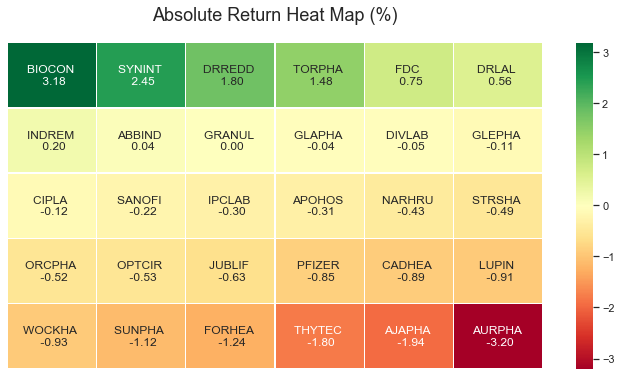

In [3]:
pl.plotAbsRetHeatMap(df, heatmap_rows=5, heatmap_cols=6, fs=(12,6))

In [2]:
mydf=datafarm.get_eod_data_with_fred('SP500','2010-10-25','2020-10-20')
mydf.head(5)

Open     High      Low    Close  Adjusted_close  Volume
2012-09-03      NaN      NaN      NaN      NaN             NaN       0
2012-09-04  1404.94  1404.94  1404.94  1404.94         1404.94       0
2012-09-05  1403.44  1403.44  1403.44  1403.44         1403.44       0
2012-09-06  1432.12  1432.12  1432.12  1432.12         1432.12       0
2012-09-07  1437.92  1437.92  1437.92  1437.92         1437.92       0

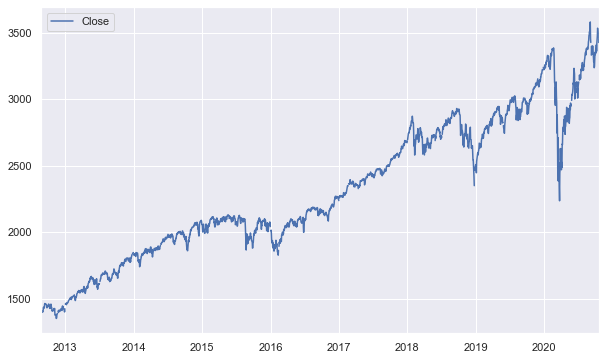

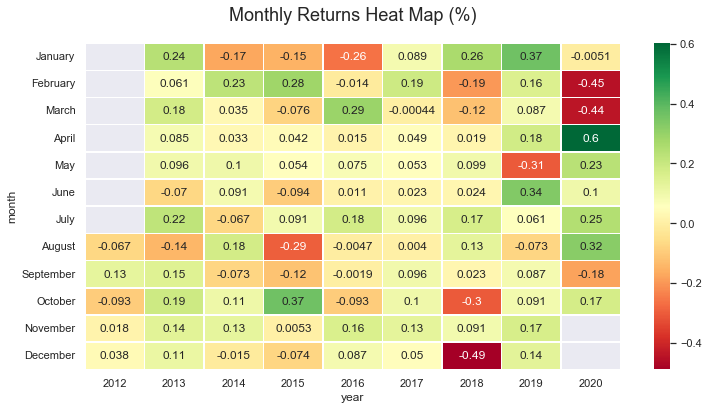

In [5]:
mydf[['Close']].plot(figsize=(10,6))
pl.plotMonthlyHeatmap(mydf.dropna(),lbl='Close',demeaned=False, fs=(12,6))

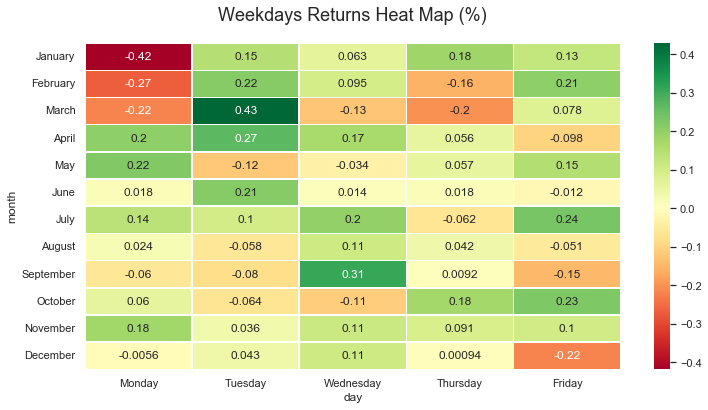

In [6]:
pl.plotWeeklyHeatmap(mydf.dropna())


In [7]:
import pickle
fname='goldMin.pickle'
with open(fname, 'rb') as handle:
    df = pickle.load(handle) 
ohlcv_dict = {
 'Open': 'first',
 'High': 'max',
 'Low': 'min',
 'Close': 'last',
 'Adjusted_close': 'last',
 'Volume': 'sum'
}
df = df.resample('60Min').agg(ohlcv_dict).dropna()

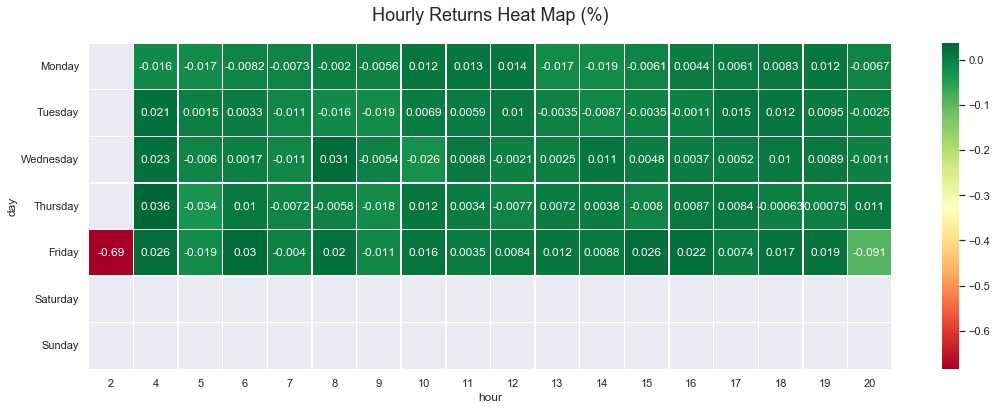

In [9]:
pl.plotHourlyHeatmap(df,lbl='Close',demeaned=False,fs=(18,6))

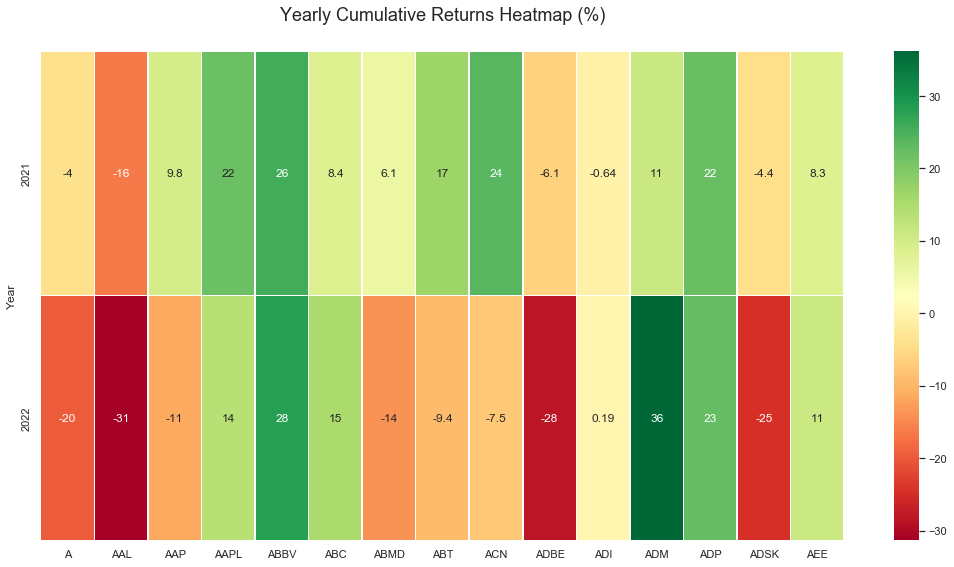

In [5]:
df=rpkl('prices')
crets=pl.plotHeatMapCumRets(df)


In [6]:
import pandas as pd
df=pd.read_pickle('treemap')
df2=pd.read_pickle('treemap2')
df=df.set_index('symbol')
df2=df2.set_index('symbol')
result = pd.concat([df, df2], axis=1, join='inner')
result['symbol']=result.index
result.columns

Index(['name', 'has_intraday', 'has_eod', 'AssetType', 'Sector', 'Industry',
       'avg10Volume', 'avg30Volume', 'beta', 'companyName', 'day200MovingAvg',
       'day30ChangePercent', 'day50MovingAvg', 'day5ChangePercent',
       'dividendYield', 'employees', 'exDividendDate', 'float', 'marketcap',
       'maxChangePercent', 'month1ChangePercent', 'month3ChangePercent',
       'month6ChangePercent', 'nextDividendDate', 'nextEarningsDate',
       'peRatio', 'sharesOutstanding', 'ttmDividendRate', 'ttmEPS',
       'week52change', 'week52high', 'week52low', 'year1ChangePercent',
       'year2ChangePercent', 'year5ChangePercent', 'ytdChangePercent',
       'symbol'],
      dtype='object')

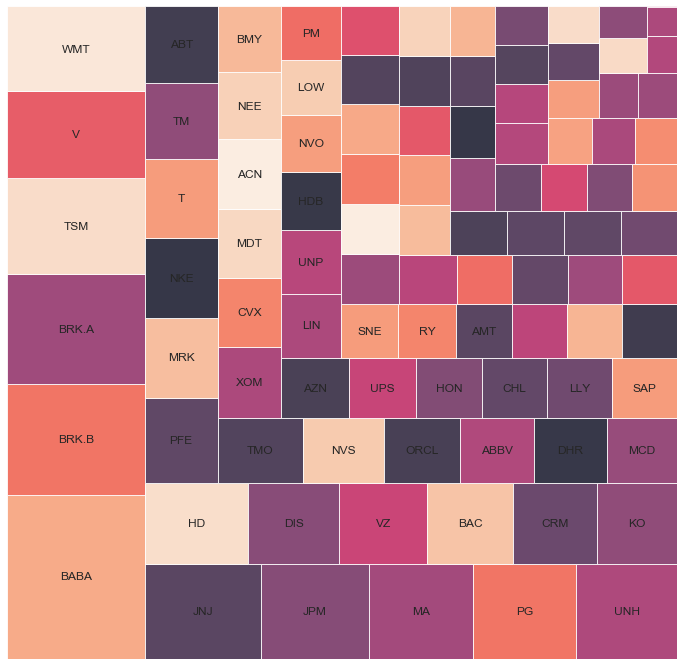

Index(['BABA', 'BRK.B', 'BRK.A', 'TSM', 'V', 'WMT', 'JNJ', 'JPM', 'MA', 'PG',
       'UNH', 'HD', 'DIS', 'VZ', 'BAC', 'CRM', 'KO', 'PFE', 'MRK', 'NKE', 'T',
       'TM', 'ABT', 'TMO', 'NVS', 'ORCL', 'ABBV', 'DHR', 'MCD', 'XOM', 'CVX',
       'MDT', 'ACN', 'NEE', 'BMY', 'AZN', 'UPS', 'HON', 'CHL', 'LLY', 'SAP',
       'LIN', 'UNP', 'HDB', 'NVO', 'LOW', 'PM', 'SNE', 'RY', 'AMT'],
      dtype='object', name='symbol')

In [7]:
ret=rpt.plotTreemapByExchange(result,'marketcap',limit=50)
ret[1]

In [20]:
list(result.Sector.unique())

['Retail Trade',
 'Finance',
 'Health Technology',
 'Consumer Non-Durables',
 'Electronic Technology',
 'Communications',
 'Health Services',
 'Energy Minerals',
 'Consumer Services',
 'Consumer Durables',
 'Technology Services',
 'Utilities',
 'Producer Manufacturing',
 'Transportation',
 'Process Industries',
 'Industrial Services',
 'Commercial Services']

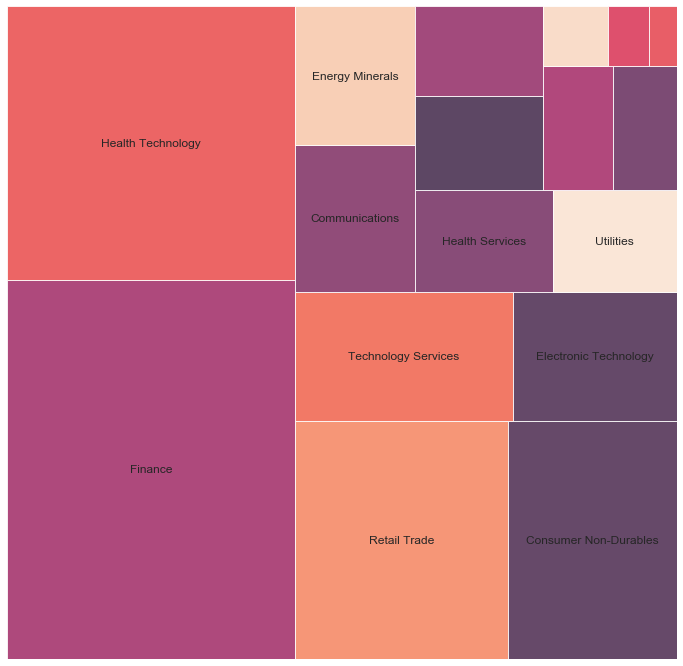

Index(['Finance', 'Health Technology', 'Retail Trade', 'Consumer Non-Durables',
       'Technology Services', 'Electronic Technology', 'Communications',
       'Energy Minerals', 'Health Services', 'Utilities'],
      dtype='object', name='Sector')

In [8]:
ret=rpt.plotTreemapBySector(result,'marketcap',limit=10)
ret[1]

In [21]:
list(result.Industry.unique())

['Internet Retail',
 'Multi-Line Insurance',
 'Finance/Rental/Leasing',
 'Major Banks',
 'Pharmaceuticals: Major',
 'Food Retail',
 'Household/Personal Care',
 'Semiconductors',
 'Major Telecommunications',
 'Managed Health Care',
 'Home Improvement Chains',
 'Beverages: Non-Alcoholic',
 'Integrated Oil',
 'Media Conglomerates',
 'Motor Vehicles',
 'Packaged Software',
 'Aerospace & Defense',
 'Wireless Telecommunications',
 'Restaurants',
 'Apparel/Footwear',
 'Medical Specialties',
 'Financial Conglomerates',
 'Tobacco',
 'Electric Utilities',
 'Information Technology Services',
 'Industrial Conglomerates',
 'Railroads',
 'Real Estate Investment Trusts',
 'Chemicals: Specialty',
 'Regional Banks',
 'Beverages: Alcoholic',
 'Data Processing Services',
 'Drugstore Chains',
 'Air Freight/Couriers',
 'Electronics/Appliances',
 'Oil & Gas Pipelines',
 'Investment Managers',
 'Apparel/Footwear Retail',
 'Investment Banks/Brokers',
 'Financial Publishing/Services',
 'Trucks/Construction/Far

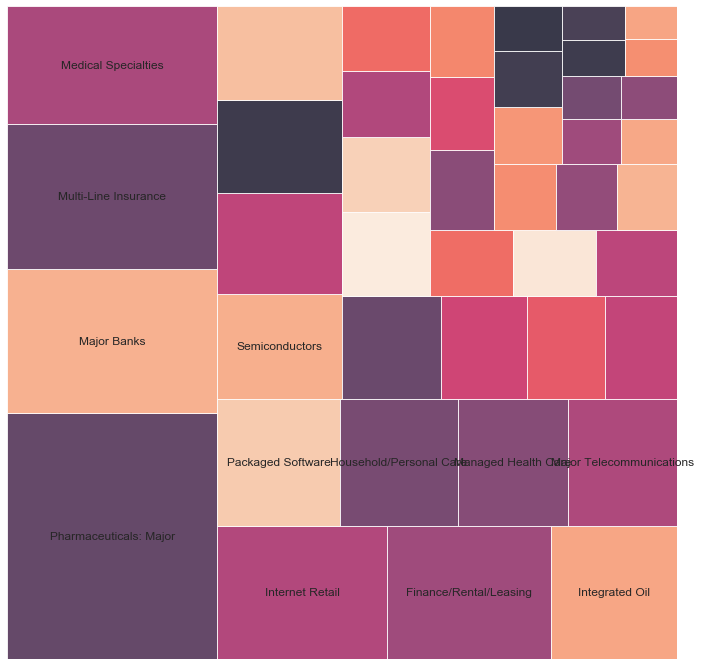

In [9]:
ret=rpt.plotTreemapByIndustry(result,'marketcap',limit=12)

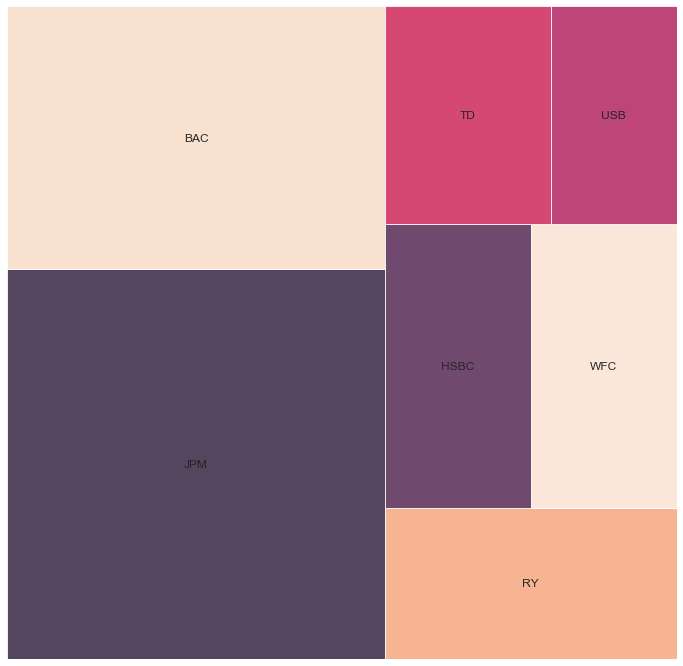

In [13]:
ret=rpt.plotTreemapIndustryComponents(result,'marketcap','Major Banks',limit=12)

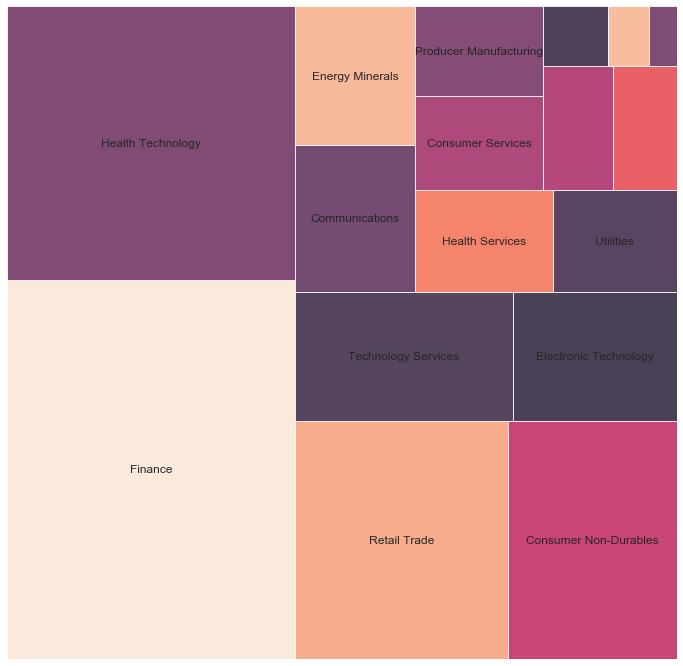

In [14]:
ret=rpt.plotTreemapBySector(result,'marketcap',limit=12)

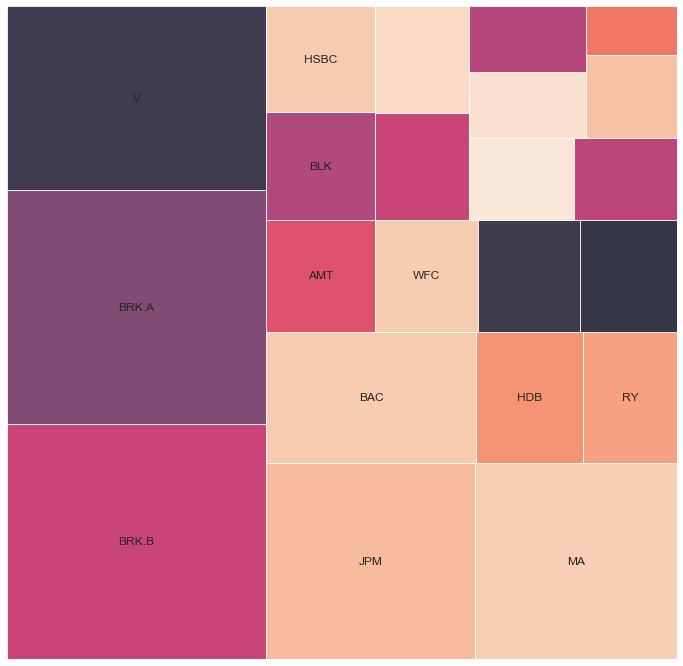

In [15]:
ret=rpt.plotTreemapSectorComponents(result,'marketcap','Finance',limit=12)

In [2]:
df = pd.read_pickle("res.pkl")
df = df.T.head(10).T
df

A    AAL     AAP    AAPL    ABBV     ABC  \
Date                                                                       
2021-09-27 00:00:00-04:00  166.38  21.50  218.46  145.00  107.65  122.63   
2021-09-28 00:00:00-04:00  159.90  21.40  214.78  142.40  107.34  121.29   
2021-09-29 00:00:00-04:00  160.00  21.08  216.77  143.37  108.95  122.50   
2021-09-30 00:00:00-04:00  157.53  20.51  208.89  141.76  108.27  119.45   
2021-10-01 00:00:00-04:00  155.99  21.75  208.00  142.58  109.11  119.81   
...                           ...    ...     ...     ...     ...     ...   
2022-08-01 00:00:00-04:00  133.80  14.22  195.99  161.40  140.49  145.93   
2022-08-02 00:00:00-04:00  131.00  14.12  195.02  160.00  140.40  142.81   
2022-08-03 00:00:00-04:00  134.56  14.51  195.27  165.84  141.40  141.01   
2022-08-04 00:00:00-04:00  133.77  14.86  191.56  165.86  139.05  139.06   
2022-08-05 00:00:00-04:00  133.61  14.73  193.42  165.11  138.04  141.31   

                             ABMD     ABT     ACN    ADBE  
Date                                                       
2021-09-27 00:00:00-04:00  338.47  120.51  334.51  603.30  
2021-09-28 00:00:00-04:00  331.27  118.74  324.21  580.25  
2021-09-29 00:00:00-04:00  329.51  119.46  323.53  580.30  
2021-09-30 00:00:00-04:00  325.52  118.13  319.92  576.00  
2021-10-01 00:00:00-04:00  323.33  117.30  324.86  578.00  
...                           ...     ...     ...     ...  
2022-08-01 00:00:00-04:00  291.90  109.30  304.74  411.09  
2022-08-02 00:00:00-04:00  293.63  108.80  302.48  409.96  
2022-08-03 00:00:00-04:00  301.46  109.61  308.17  424.00  
2022-08-04 00:00:00-04:00  292.24  109.72  310.61  430.59  
2022-08-05 00:00:00-04:00  291.50  109.25  309.35  432.77  

[217 rows x 10 columns]

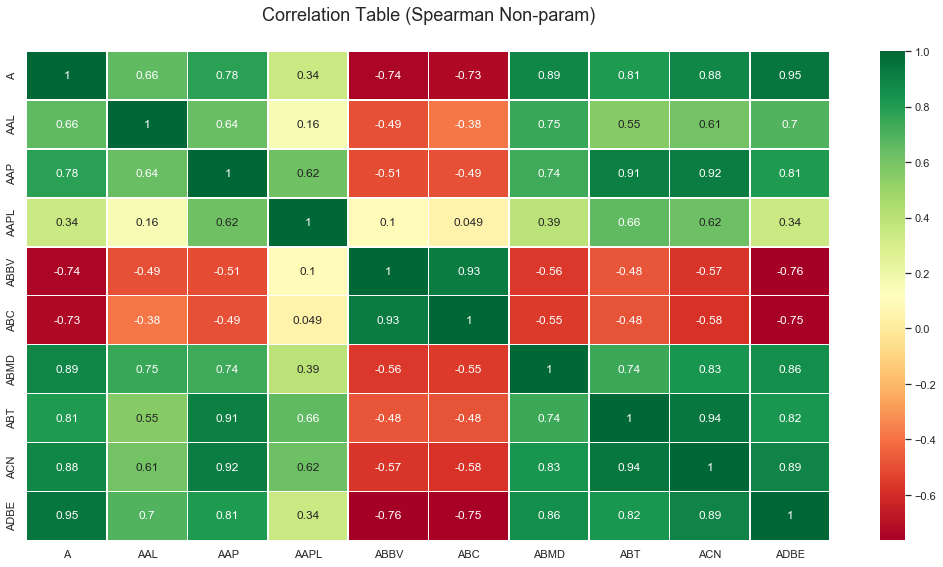

A       AAL       AAP      AAPL      ABBV       ABC      ABMD  \
A     1.000000  0.659727  0.780777  0.343609 -0.741264 -0.726443  0.888523   
AAL   0.659727  1.000000  0.636511  0.159522 -0.489959 -0.382495  0.751829   
AAP   0.780777  0.636511  1.000000  0.615709 -0.506180 -0.492769  0.736384   
AAPL  0.343609  0.159522  0.615709  1.000000  0.101695  0.049383  0.394043   
ABBV -0.741264 -0.489959 -0.506180  0.101695  1.000000  0.928140 -0.557024   
ABC  -0.726443 -0.382495 -0.492769  0.049383  0.928140  1.000000 -0.550574   
ABMD  0.888523  0.751829  0.736384  0.394043 -0.557024 -0.550574  1.000000   
ABT   0.811703  0.554697  0.911421  0.661308 -0.475236 -0.483982  0.744589   
ACN   0.883527  0.611850  0.918855  0.624683 -0.574186 -0.577706  0.833753   
ADBE  0.949844  0.696100  0.808377  0.341461 -0.763573 -0.750422  0.855798   

           ABT       ACN      ADBE  
A     0.811703  0.883527  0.949844  
AAL   0.554697  0.611850  0.696100  
AAP   0.911421  0.918855  0.808377  
AAPL  0.661308  0.624683  0.341461  
ABBV -0.475236 -0.574186 -0.763573  
ABC  -0.483982 -0.577706 -0.750422  
ABMD  0.744589  0.833753  0.855798  
ABT   1.000000  0.943682  0.823943  
ACN   0.943682  1.000000  0.892120  
ADBE  0.823943  0.892120  1.000000

In [4]:
pl.plotCorrelationTable(df)

In [1]:
tickers=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE']
ds='2021-09-27'
de='2022-08-05'
#df,df2,df3,names=rpt.getData(tickers,ds,de,lbl=['Close','Volume'],provider='mstack')
#wpkl('prices', df)
#wpkl('volumes', df2)
#wpkl('pricesRT', df3)
#wpkl('names', names)
df=rpkl('prices')
df2=rpkl('volumes')
df3=rpkl('pricesRT')
names=rpkl('names')


In [2]:
w,ws=rpt.getWatchlist(df,df2,df3,names,realtime=True,contrast=(0.7,0.5))
ws

/Users/rob/opt/intelpython/latest/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
import Plib.DataFarm.EODQuotes as eod
#spy=eod.getData('SPY.US',sd='1900-01-05',ed='2022-09-10',tz='America/New_York')
#mdf=spy[['Close']]
#mdf.columns=['SPY']
#wpkl('spy', mdf)
mdf=rpkl('spy')


In [6]:
dd,dds=rpt.getMDDHistoryRets(mdf,days1sem=120,top=15,bydate=True,ascending=False,contrast=(0.7,1))
dds

